<div style="
background:linear-gradient(135deg,#1e40af,#2563eb)!important;
padding:40px 30px;
border-radius:16px;
margin-bottom:30px;
box-shadow:0 10px 25px rgba(0,0,0,0.2);
">

<h1 style="margin-top:0;font-size:34px;color:white !important;">
⚽ Football Players EDA (2025–26 Season)
</h1>

<p style="font-size:17px;line-height:1.7;color:white !important;max-width:850px;">
This notebook presents a comprehensive Exploratory Data Analysis (EDA) of the 2025–26 Football Players dataset.
The primary goal is to uncover meaningful insights into modern football performance through structured analysis and visualization.
</p>

<h3 style="margin-top:25px;color:white !important;">🎯 Objectives</h3>

<ul style="font-size:16px;line-height:1.8;padding-left:20px;color:white !important;">
<li style="color:white !important;">Understand player demographics (age, nationality, position)</li>
<li style="color:white !important;">Analyze goal-scoring patterns and performance trends</li>
<li style="color:white !important;">Compare positional contributions</li>
<li style="color:white !important;">Explore relationships between numerical features using correlation analysis</li>
</ul>

<p style="font-size:16px;line-height:1.7;margin-top:20px;color:white !important;max-width:850px;">
Through visualizations and statistical summaries, this analysis highlights key patterns across player roles, nationalities, and performance metrics, providing a data-driven perspective on professional football.
</p>

</div>



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/football-players-stats-2025-2026/players_data-2025_2026.csv
/kaggle/input/football-players-stats-2025-2026/players_data_light-2025_2026.csv


In [2]:
df = pd.read_csv("/kaggle/input/football-players-stats-2025-2026/players_data-2025_2026.csv")

df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld,Off,Crs,Int,TklW,OG
0,1,Brenden Aaronson,us USA,"FW,MF",Leeds United,eng Premier League,25.0,2000.0,25,19,...,1,0,0,14,35,5,28,12,21,0
1,2,Zach Abbott,eng ENG,DF,Nottingham Forest,eng Premier League,19.0,2006.0,2,1,...,0,0,0,2,1,0,3,2,2,0
2,3,Jones El-Abdellaoui,ma MAR,"MF,FW",Celta Vigo,es La Liga,20.0,2006.0,14,3,...,0,0,0,3,3,1,24,1,0,0
3,4,Himad Abdelli,dz ALG,"FW,MF",Marseille,fr Ligue 1,26.0,1999.0,1,0,...,0,0,0,2,0,0,0,0,0,0
4,5,Himad Abdelli,dz ALG,MF,Angers,fr Ligue 1,26.0,1999.0,13,11,...,1,0,0,16,12,1,9,13,17,0


### Shape of dataset

In [3]:
df.shape

(2625, 102)

### Information of all Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2625 entries, 0 to 2624
Columns: 102 entries, Rk to OG
dtypes: float64(41), int64(40), object(21)
memory usage: 2.0+ MB


### Summary

In [5]:
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld,Off,Crs,Int,TklW,OG
count,2625.000000,2623.000000,2623.00000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,...,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,1313.000000,25.633244,1999.52764,12.966095,9.202286,825.857524,9.176495,1.115810,0.770667,1.886476,...,1.643048,0.084571,0.027810,9.993905,9.475429,1.398095,14.652571,6.792000,8.102857,0.033143
std,757.916552,4.507354,4.50179,7.379933,7.440864,635.171262,7.058000,2.035395,1.297855,2.855392,...,1.794782,0.298130,0.166759,9.135913,10.031898,2.682159,23.380120,7.848568,8.532940,0.187364
min,1.000000,16.000000,1983.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,657.000000,22.000000,1997.00000,6.000000,2.000000,227.000000,2.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1313.000000,25.000000,2000.00000,14.000000,8.000000,748.000000,8.300000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,8.000000,6.000000,0.000000,5.000000,4.000000,5.000000,0.000000
75%,1969.000000,29.000000,2003.00000,19.000000,16.000000,1339.000000,14.900000,1.000000,1.000000,3.000000,...,3.000000,0.000000,0.000000,16.000000,14.000000,2.000000,18.000000,11.000000,13.000000,0.000000
max,2625.000000,42.000000,2009.00000,26.000000,26.000000,2340.000000,26.000000,24.000000,16.000000,29.000000,...,10.000000,3.000000,2.000000,55.000000,70.000000,30.000000,183.000000,49.000000,47.000000,2.000000


### All column list

In [6]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts',
       ...
       'CrdY_stats_misc', 'CrdR_stats_misc', '2CrdY', 'Fls', 'Fld', 'Off',
       'Crs', 'Int', 'TklW', 'OG'],
      dtype='object', length=102)

### checking column with most missing values

In [7]:
df.isnull().sum().sort_values(ascending=False).head(40)

CS%                          2468
Save%                        2467
W                            2466
Saves                        2466
Rk_stats_keeper              2466
GA90                         2466
D                            2466
Starts_stats_keeper          2466
MP_stats_keeper              2466
Born_stats_keeper            2466
Pos_stats_keeper             2466
Comp_stats_keeper            2466
90s_stats_keeper             2466
SoTA                         2466
Age_stats_keeper             2466
Min_stats_keeper             2466
Nation_stats_keeper          2466
PKA                          2466
PKatt_stats_keeper           2466
CS                           2466
L                            2466
GA                           2466
PKsv                         2466
PKm                          2466
G/SoT                         877
Mn/Sub                        479
SoT%                          468
G/Sh                          468
Mn/Start                      368
On-Off        

### Player count in each postion

In [8]:
df['Pos'].value_counts()

Pos
MF       873
DF       661
FW       382
MF,FW    184
GK       159
FW,MF    138
DF,MF    126
MF,DF     98
DF,FW      4
Name: count, dtype: int64

<div style="background:#f9fafb; padding:20px; border-radius:10px; border-left:4px solid #2563eb; margin:20px 0;">

<h3 style="margin-top:0; color:#1f2937;">📌 Position Normalization</h3>

<p style="font-size:16px; line-height:1.7; color:#374151;">
The original <b>Pos</b> column contains multiple roles for some players (e.g., <i>"FW,MF"</i> or <i>"DF,MF"</i>), which makes direct aggregation and visualization challenging. To ensure consistent positional analysis, a new feature <b>Primary_Pos</b> was created by extracting the first listed position for each player.
</p>

<p style="font-size:16px; line-height:1.7; color:#374151;">
This transformation assigns every player a single primary role, enabling clearer grouping, accurate frequency counts, and more interpretable visualizations across positional categories.
</p>

</div>


In [9]:
df['Primary_Pos'] = df['Pos'].str.split(',').str[0]
df['Primary_Pos'].value_counts()

Primary_Pos
MF    1155
DF     791
FW     520
GK     159
Name: count, dtype: int64

# EDA

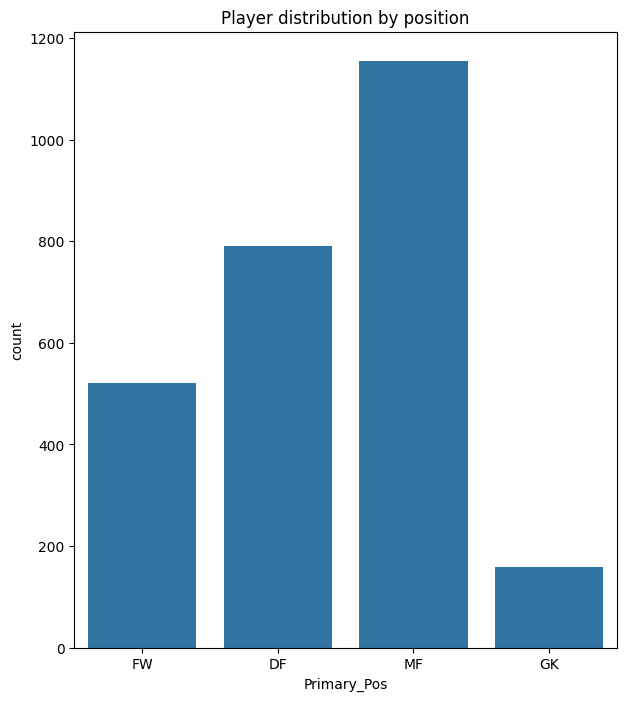

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,8))
sns.countplot(x='Primary_Pos', data=df)
plt.title("Player distribution by position")
plt.show()

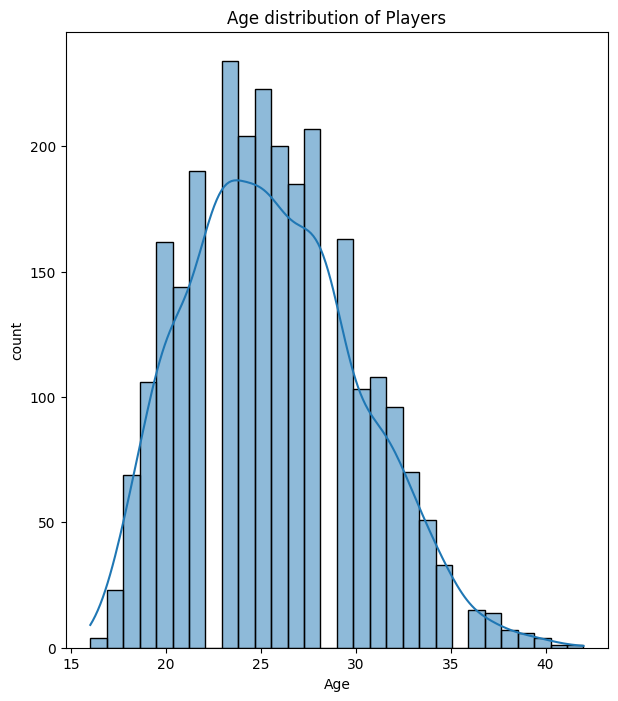

In [11]:
plt.figure(figsize=(7,8))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age distribution of Players")
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

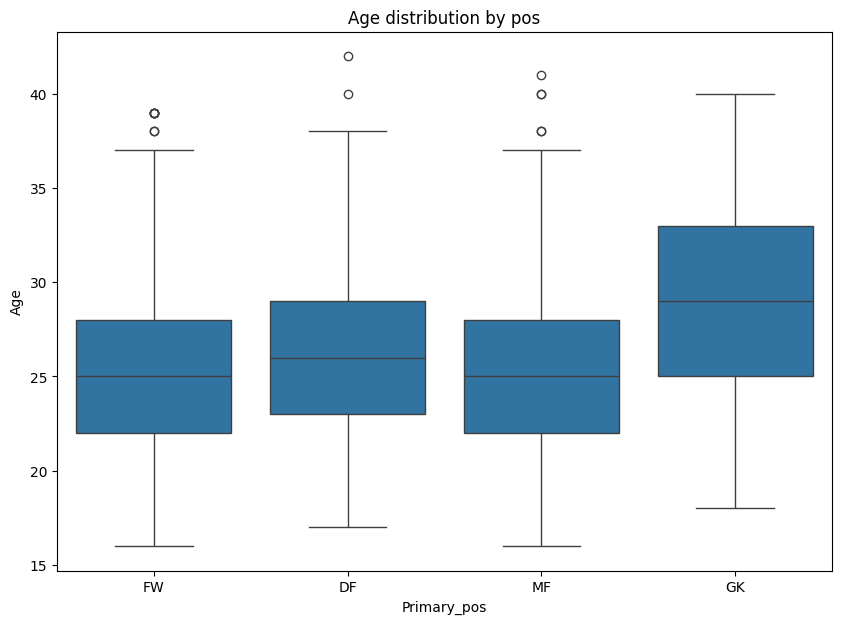

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Primary_Pos', y='Age', data=df)
plt.title("Age distribution by pos")
plt.xlabel("Primary_pos")
plt.ylabel("Age")
plt.show()

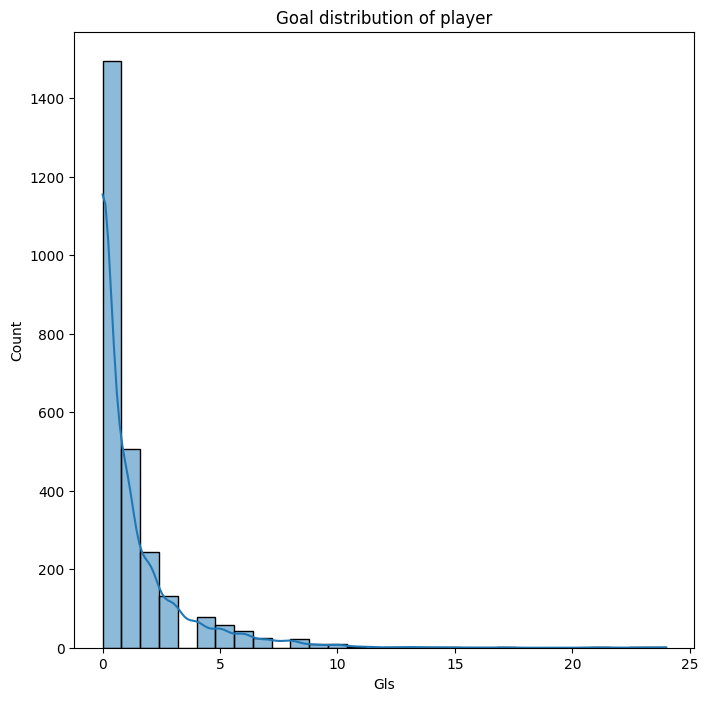

In [13]:
plt.figure(figsize=(8,8))
sns.histplot(df["Gls"], bins=30, kde=True)
plt.title("Goal distribution of player")
plt.show()

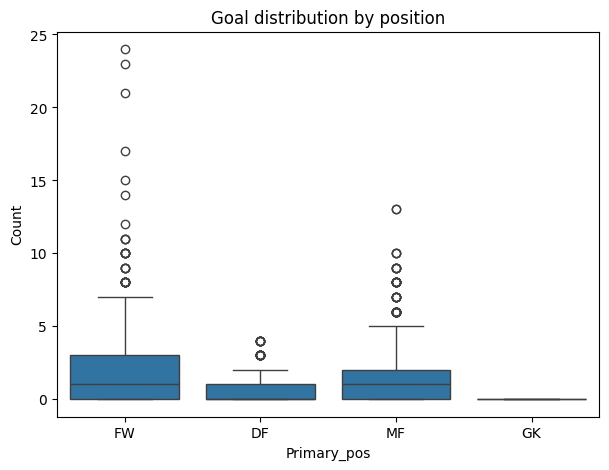

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Primary_Pos', y='Gls', data=df)
plt.title("Goal distribution by position")
plt.xlabel("Primary_pos")
plt.ylabel("Count")
plt.show()

In [15]:
df['Nation'].nunique()

110

In [16]:
top_10_nations = df['Nation'].value_counts().head(10)
top_10_nations

Nation
es ESP     377
fr FRA     311
de GER     211
it ITA     190
eng ENG    187
br BRA      86
nl NED      81
ar ARG      77
pt POR      58
be BEL      55
Name: count, dtype: int64

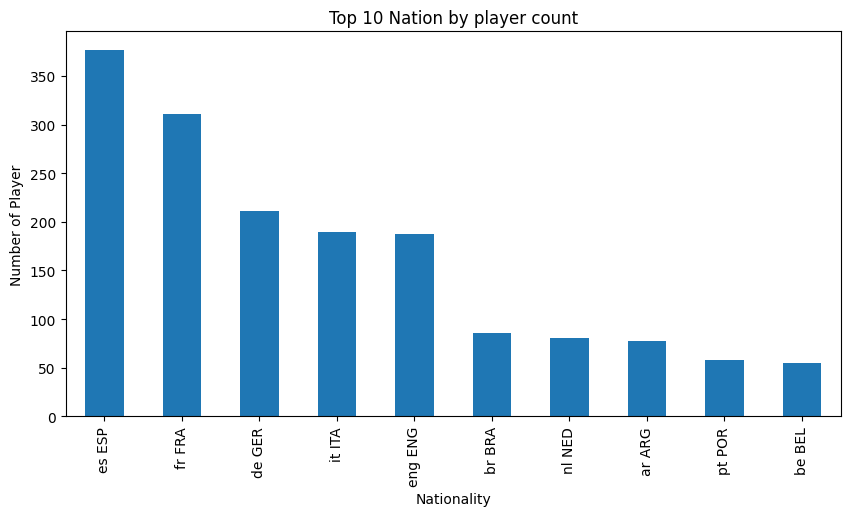

In [17]:
plt.figure(figsize=(10, 5))
top_10_nations.plot(kind='bar')
plt.title("Top 10 Nation by player count")
plt.xlabel("Nationality")
plt.ylabel("Number of Player")
plt.show()

In [18]:
top_country_goals = df.groupby('Nation')['Gls'].sum().sort_values(ascending=False).head(10)

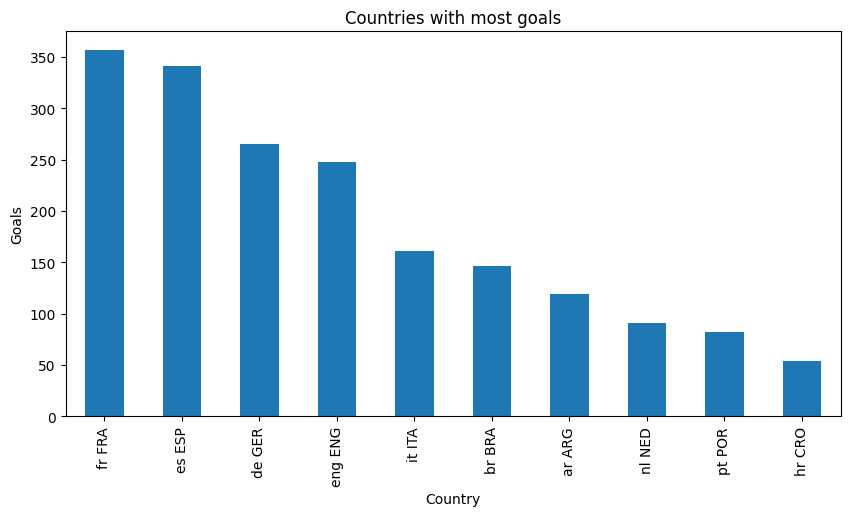

In [19]:
plt.figure(figsize=(10, 5))
top_country_goals.plot(kind='bar')
plt.title("Countries with most goals")
plt.xlabel("Country")
plt.ylabel("Goals")
plt.show()

In [20]:
top_countries = df.groupby('Nation')['Gls'].mean().sort_values(ascending=False).head(10)


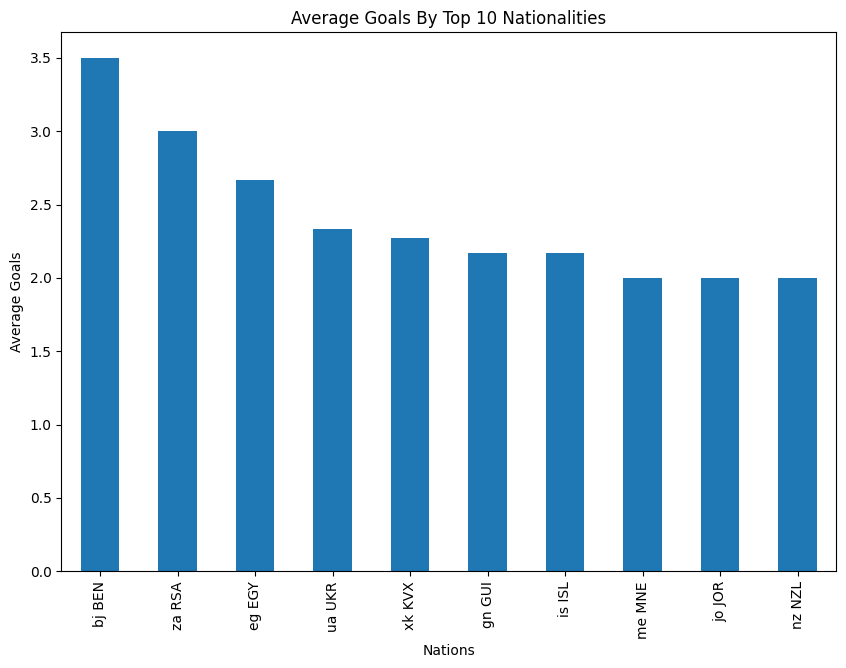

In [21]:
plt.figure(figsize=(10,7))
top_countries.plot(kind='bar')
plt.title("Average Goals By Top 10 Nationalities")
plt.xlabel("Nations")
plt.ylabel("Average Goals")
plt.show()

In [22]:
num_df = df.select_dtypes(include='number')

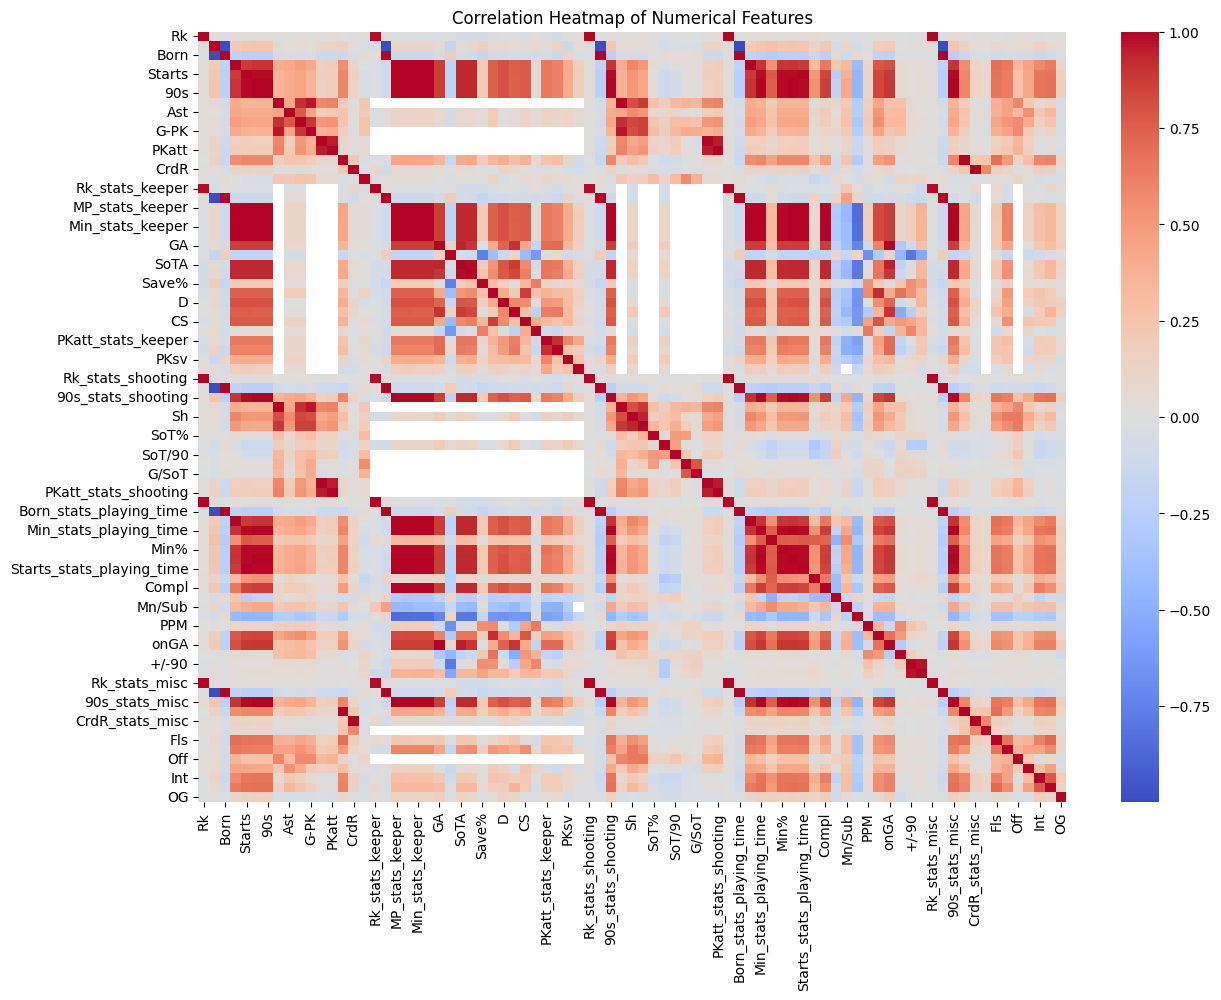

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(num_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<!DOCTYPE html>
<html>
<head>
<style>
body {
    font-family: "Segoe UI", Arial, sans-serif;
    background: linear-gradient(135deg,#eef2ff,#f8fafc);
}

.insights-container {
    max-width: 950px;
    margin: 40px auto;
    padding: 30px;
    background: white;
    border-radius: 16px;
    box-shadow: 0 10px 25px rgba(0,0,0,0.08);
}

.insights-title {
    font-size: 32px;
    font-weight: 700;
    margin-bottom: 25px;
    color: #1f2933;
}

.section {
    background: #f9fafb;
    padding: 18px 22px;
    border-radius: 12px;
    margin-bottom: 18px;
    transition: 0.3s ease;
}

.section:hover {
    transform: translateY(-2px);
    box-shadow: 0 4px 12px rgba(0,0,0,0.08);
}

.section h3 {
    color: #2563eb;
    margin-bottom: 10px;
    font-size: 22px;
}

.section ul {
    padding-left: 0;
    list-style: none;
}

.section li {
    font-size: 18px;
    margin-bottom: 10px;
    line-height: 1.7;
    padding-left: 28px;
    position: relative;
    color: #374151;
}

.section li::before {
    content: "✔";
    position: absolute;
    left: 0;
    color: #2563eb;
    font-weight: bold;
}

.highlight {
    background: linear-gradient(135deg,#eef2ff,#e0e7ff);
    padding: 18px;
    border-left: 5px solid #2563eb;
    border-radius: 10px;
    margin-top: 25px;
    font-size: 18px;
}
</style>
</head>

<body>

<div class="insights-container">

<div class="insights-title">🧠 Key Insights</div>

<div class="section">
<h3>Dataset Composition</h3>
<ul>
<li>Midfielders represent the largest positional group, followed by defenders and forwards.</li>
<li>Goalkeepers form the smallest category, explaining structural missing values in GK-specific columns.</li>
</ul>
</div>

<div class="section">
<h3>Age Patterns</h3>
<ul>
<li>Most players fall between 20–28 years, indicating peak professional age.</li>
<li>Goalkeepers tend to have slightly higher median age compared to outfield players.</li>
</ul>
</div>

<div class="section">
<h3>Performance Trends</h3>
<ul>
<li>Forwards score significantly more goals on average than other positions.</li>
<li>Goal distribution is highly right-skewed, showing that only a small fraction of players score many goals.</li>
</ul>
</div>

<div class="section">
<h3>Nationality Insights</h3>
<ul>
<li>A few countries dominate player representation.</li>
<li>Average goal contribution varies across top nationalities.</li>
</ul>
</div>

<div class="section">
<h3>Feature Relationships</h3>
<ul>
<li>Goals show positive correlation with attacking metrics.</li>
<li>Goalkeeping metrics form a separate correlated cluster, highlighting role-specific performance.</li>
</ul>
</div>

<div class="highlight">
<strong>Overall:</strong> The dataset clearly reflects real-world football dynamics, with age, position, and attacking involvement playing major roles in player performance.
</div>

</div>

</body>
</html>
